In [1]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200213a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200213a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200213a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 38090   91.896484  0.856717
 38210  103.923889  0.867331
 38330  115.173515  0.875795
 38450  125.640175  0.882648
 38570  135.343597  0.888251
 ...           ...       ...
 61610  996.559021  0.942649
 61730  975.172302  0.928257
 61850  942.073120  0.901166
 61970  918.602173  0.882974
 62090  915.264710  0.882814
 
 [201 rows x 2 columns],            time
 0       28571.0
 1       28571.1
 2       28571.2
 3       28571.3
 4       28571.4
 ...         ...
 336665  62237.5
 336666  62237.6
 336667  62237.7
 336668  62237.8
 336669  62237.9
 
 [336670 rows x 1 columns])

In [2]:
array = np.arange(38090,62238, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
#data_int.drop(data_int.index[0:12089],inplace=True)
data_int.reset_index(inplace=True)
data_int['time']=data_int.loc[:,'index']
data_int.drop('index',axis=1)
data_int
#data_int[data_int.time==66083]
#df_r = data_int.iloc[0:274510,:]
#df_r

,index,F_dw,f_dir,time
0,38090,91.896484,0.856717,38090
1,38090,91.896484,0.856717,38090
2,38090,91.896484,0.856717,38090
3,38090,91.896484,0.856717,38090
4,38090,91.896484,0.856717,38090
...,...,...,...,...
241475,62237,915.264710,0.882814,62237
241476,62237,915.264710,0.882814,62237
241477,62237,915.264710,0.882814,62237
241478,62237,915.264710,0.882814,62237


In [3]:
#336670   - 241480  
x = data_int.iloc[0:1,:]
df_exp = pd.concat([x]*95190, ignore_index=True)
df1 = pd.concat([df_exp,data_int],axis=0)
df1.reset_index(inplace=True,drop=True)
df1.drop('index',axis=1)

,F_dw,f_dir,time
0,91.896484,0.856717,38090
1,91.896484,0.856717,38090
2,91.896484,0.856717,38090
3,91.896484,0.856717,38090
4,91.896484,0.856717,38090
...,...,...,...
336665,915.264710,0.882814,62237
336666,915.264710,0.882814,62237
336667,915.264710,0.882814,62237
336668,915.264710,0.882814,62237


In [4]:
fdw = df1.loc[:,'F_dw']
fdir = df1.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,28571,-0.699613,-0.745409,382.171356,450.741516,96.886215,-36.136642,91.896484,0.856717
1,28571,-1.659946,-0.778646,384.933075,450.897034,96.886276,-36.136173,91.896484,0.856717
2,28571,-1.322541,-1.431485,382.199188,450.769440,96.886330,-36.135708,91.896484,0.856717
3,28571,-1.300444,-0.809593,383.941284,450.276794,96.886383,-36.135239,91.896484,0.856717
4,28571,-0.939158,-0.555925,379.970032,450.033203,96.886436,-36.134769,91.896484,0.856717
...,...,...,...,...,...,...,...,...,...
336665,62237,987.353333,38.157421,385.464111,560.228577,-148.597168,59.609219,915.264710,0.882814
336666,62237,987.694336,38.673058,388.441956,560.515747,-148.596405,59.608974,915.264710,0.882814
336667,62237,986.226501,38.251770,392.717682,561.225769,-148.595657,59.608727,915.264710,0.882814
336668,62237,985.543152,39.525574,396.829590,562.062927,-148.594894,59.608479,915.264710,0.882814


In [5]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,28571,-0.699613,-0.745409,382.171356,450.741516,96.886215,-36.136642,91.896484,0.856717,1.160330,3.851857,75.449799
1,28571,-1.659946,-0.778646,384.933075,450.897034,96.886276,-36.136173,91.896484,0.856717,1.193791,4.189634,75.454887
2,28571,-1.322541,-1.431485,382.199188,450.769440,96.886330,-36.135708,91.896484,0.856717,1.270331,4.530161,75.448700
3,28571,-1.300444,-0.809593,383.941284,450.276794,96.886383,-36.135239,91.896484,0.856717,1.311718,4.887004,75.441811
4,28571,-0.939158,-0.555925,379.970032,450.033203,96.886436,-36.134769,91.896484,0.856717,1.312320,5.198797,75.429741
...,...,...,...,...,...,...,...,...,...,...,...,...
336665,62237,987.353333,38.157421,385.464111,560.228577,-148.597168,59.609219,915.264710,0.882814,-0.613938,1.296850,73.208702
336666,62237,987.694336,38.673058,388.441956,560.515747,-148.596405,59.608974,915.264710,0.882814,-0.637802,1.233774,73.185242
336667,62237,986.226501,38.251770,392.717682,561.225769,-148.595657,59.608727,915.264710,0.882814,-0.589650,1.175198,73.166382
336668,62237,985.543152,39.525574,396.829590,562.062927,-148.594894,59.608479,915.264710,0.882814,-0.393349,1.104447,73.163368


In [6]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct


In [7]:
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
#df_bigg.to_csv('df_bigg_13feb.csv')

In [8]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(62237)

[17, 17, 17]

In [11]:
import datetime
start = datetime.datetime(2020, 2, 13, 7, 56, 11)
end = datetime.datetime(2020, 2, 13, 17, 17, 17)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg.to_csv('df_bigg_13feb.csv')

In [30]:
x = df_bigg.loc[:,'shortwave_down_corrected'] > 6000
x[x].index

Int64Index([33341, 33342, 33343, 33344, 33345, 33346, 33347, 33348, 33349,
            33350, 33351, 33352, 33353, 33354, 33355, 33356],
           dtype='int64')

In [37]:
cd = df_bigg.iloc[0:33339,:]
# x = df_bigg.loc[:,'shortwave_down_corrected'] > 2000
# x[x].index

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


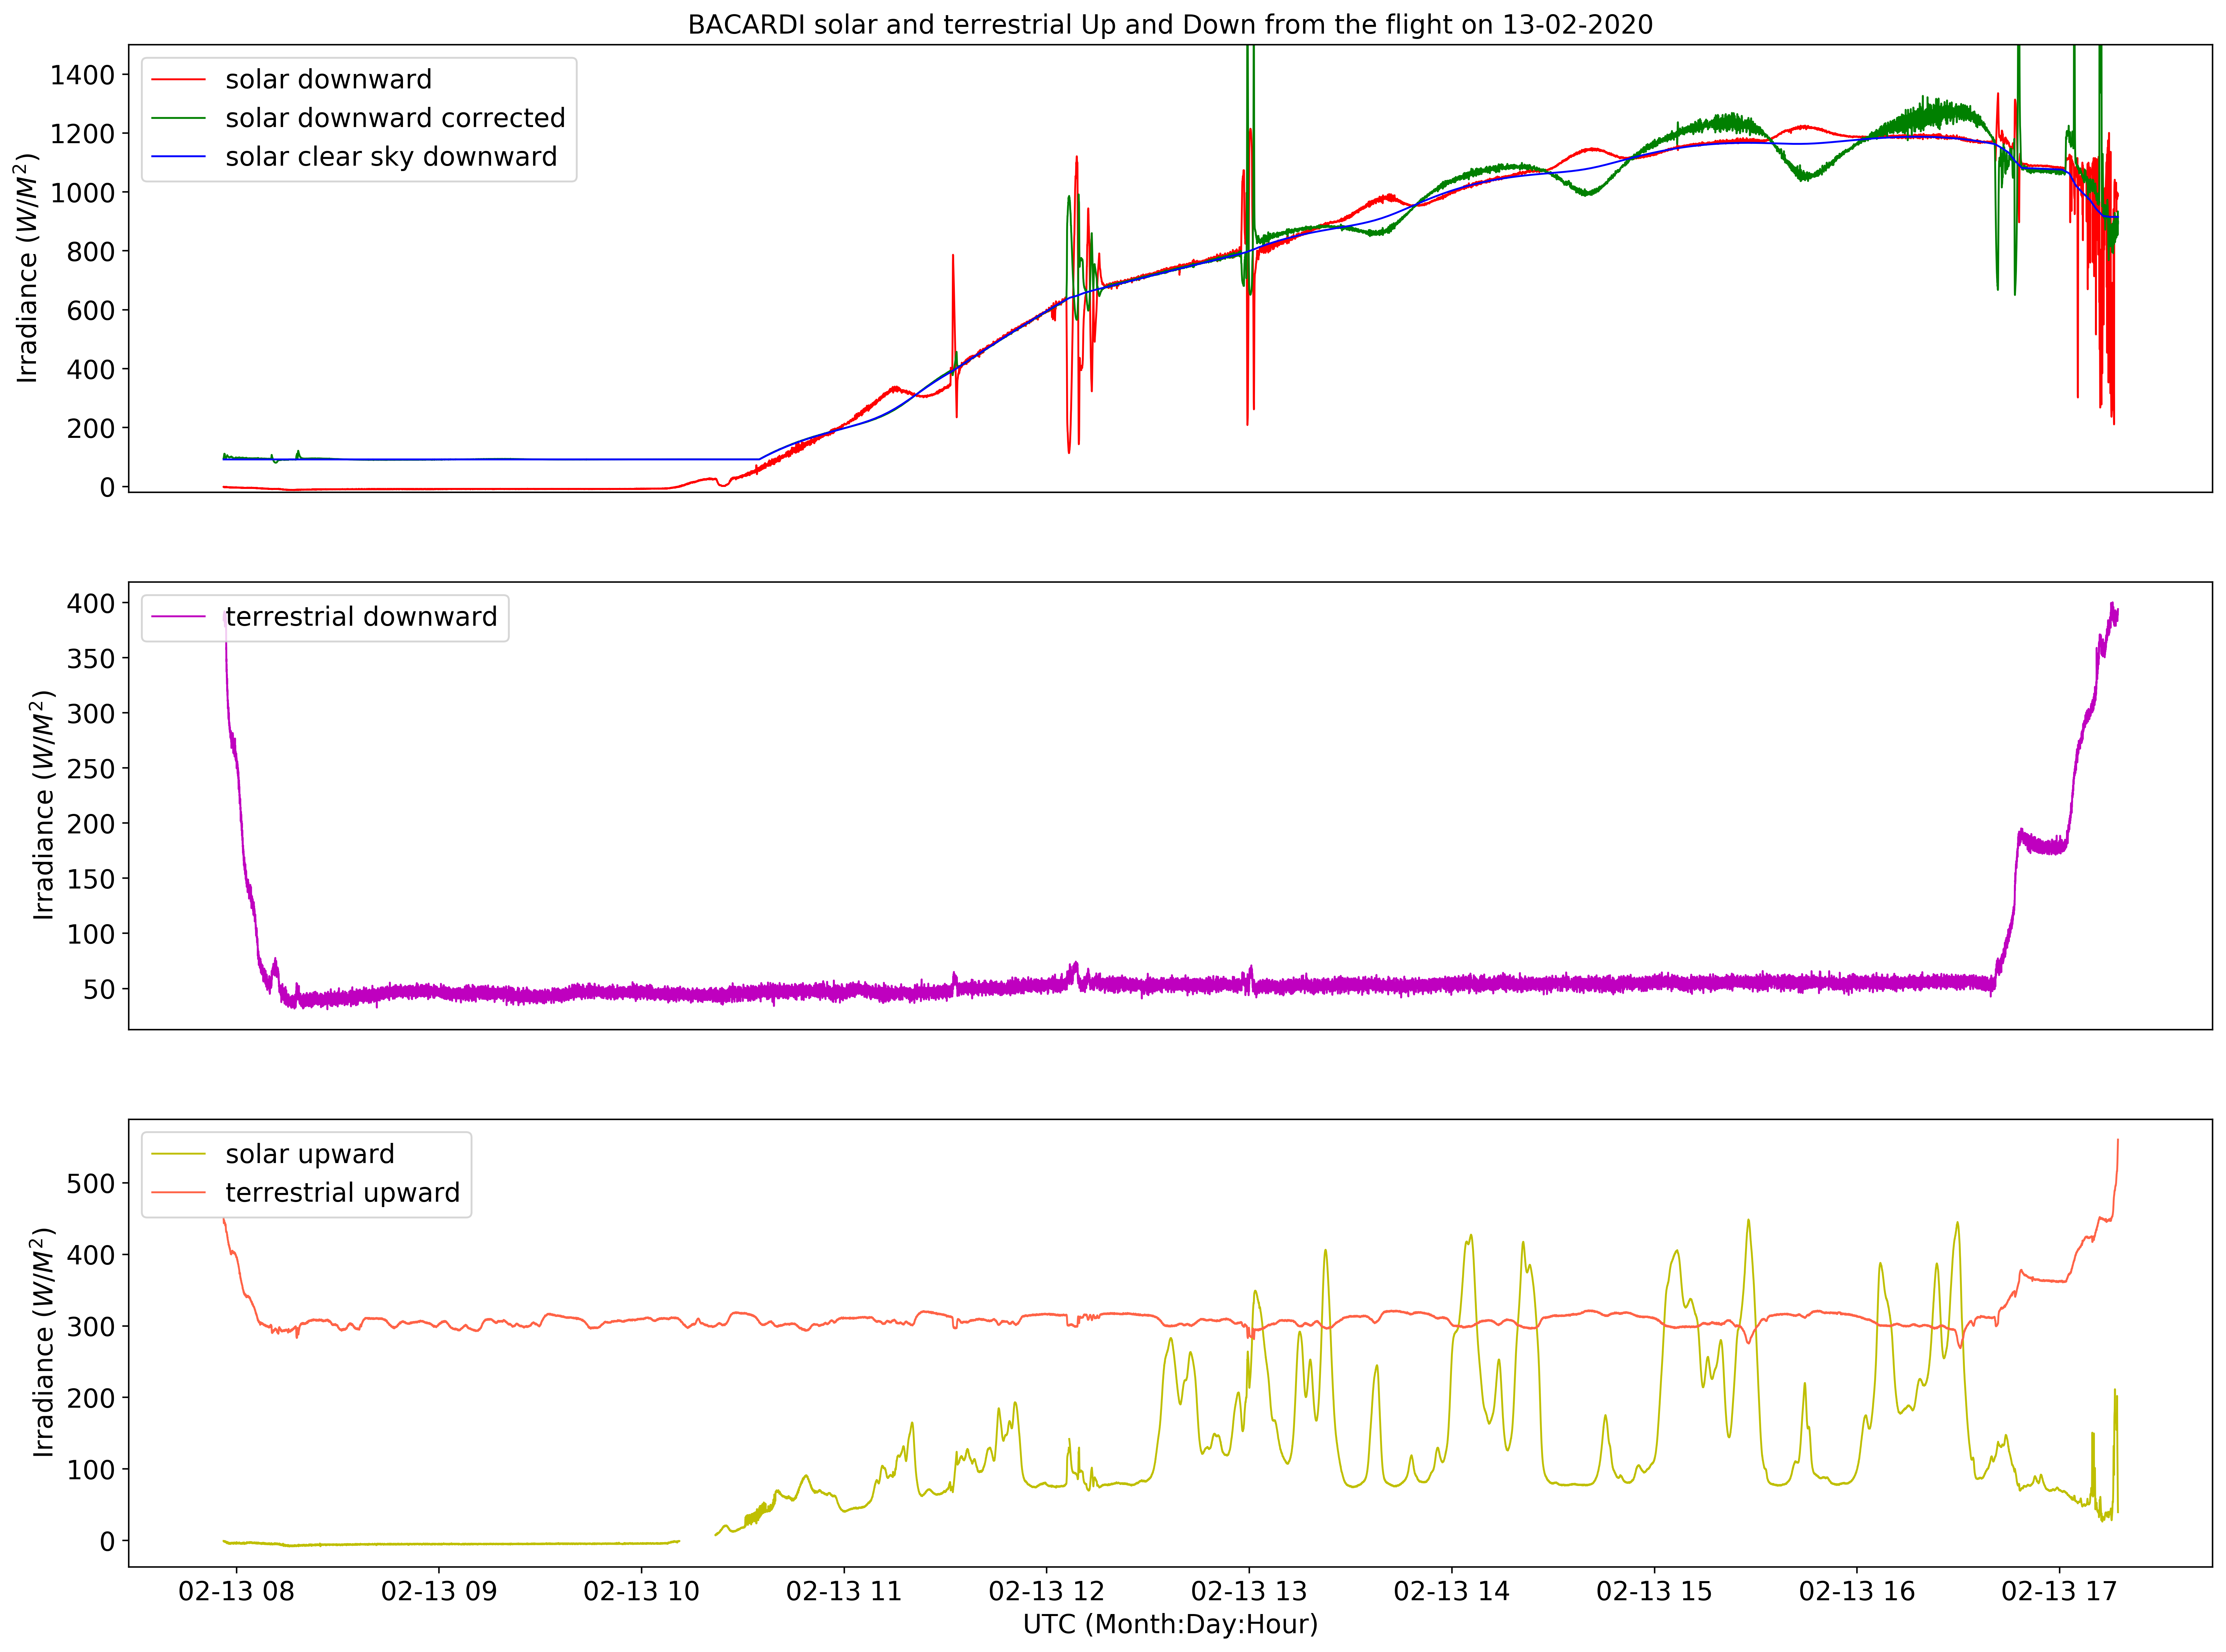

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 13-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.ylim(-20,1500)
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()

In [ ]:
x = df_bigg.loc[:,'shortwave_down_corrected'] > 3000
x[x].index

In [ ]:
df_biggg = pd.read_csv('df_bigg_13feb.csv',)
df_biggg

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_biggg.time,df_biggg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_biggg.time,df_biggg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_biggg.time,df_biggg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 13-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(312)
plt.plot(df_biggg.time,df_biggg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_biggg.time,df_biggg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_biggg.time,df_biggg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()